## Welcome to the Usecase Challenge on Time Series Analysis.


## Instructions :
- Follow the instructions and write your code 
- Press 'Shift+Enter' or use the Run Button to run each cell
- This Python Notebook contains everything you'll need to finish this challenge.
- Before submit your notebook. Restart the kernel and run all the cell. Make sure that any cell shouldn't cause any error or problem.
- Make sure not to delete any of the cells

### Question :
- Load the FTSE data for 24 Months (1 Aug 2019 to 30 July 2021) with daily closing prices 

- Perform Seasonal Decompose using additive and multiplicative methods 

- Plot the ACF and PACF values 

- Calculate AR and MR Model summary



### Importing packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA

### Reading the Data

In [2]:
#Read the FTSE_Data and save it in df variable
#Write your code here
df = pd.read_csv('FTSE_Data.csv')

In [4]:
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)
print(df.head())
df

            Open_Price  Close_Price  High_Price  Low_Price      Volume
Date                                                                  
2019-08-01     7586.78      7584.87     7609.98    7535.90   822491456
2019-08-02     7584.87      7407.06     7585.24    7397.91  1043849664
2019-08-05     7407.06      7223.85     7407.06    7200.54  1269942016
2019-08-06     7223.85      7171.69     7241.57    7166.98   744772160
2019-08-07     7171.69      7198.70     7237.88    7153.89   748412672


,Open_Price,Close_Price,High_Price,Low_Price,Volume
Date,,,,,
2019-08-01,7586.78,7584.87,7609.98,7535.90,822491456
2019-08-02,7584.87,7407.06,7585.24,7397.91,1043849664
2019-08-05,7407.06,7223.85,7407.06,7200.54,1269942016
2019-08-06,7223.85,7171.69,7241.57,7166.98,744772160
2019-08-07,7171.69,7198.70,7237.88,7153.89,748412672
...,...,...,...,...,...
2021-07-26,7027.58,7025.43,7038.65,6980.67,524675744
2021-07-27,7025.43,6996.08,7028.37,6929.64,515215456
2021-07-28,6996.08,7016.63,7023.35,6974.80,595935808


### Time series decomposition
We can decompose a time series into three components:

*   Trend: Pattern
*   Seasonality: Cyclical effects
*   Residuals: Error of prediction


#### Additive Decompose
_Additive method_ assumes the time series follows a nearly linear trend. Here, observed value is the sum of its components(trend,seasonality,noise)

Observed = trend + seasonal + residual

#### Note:
- Put figsize as (10,5)
- Store the output plot in A1 variable

**Sample image:**
    
<img src='Sample_images/Expected1.png' style='width:600px;height:400px'>

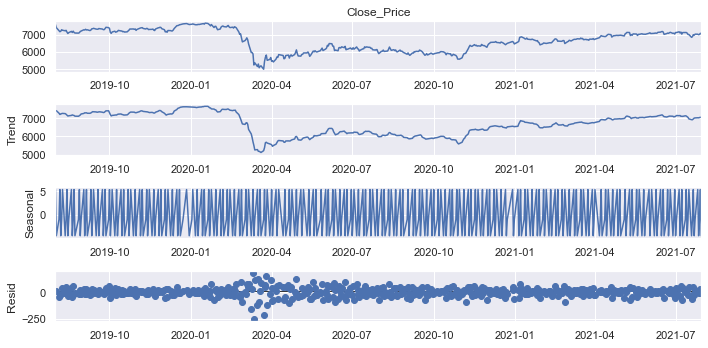

In [9]:
#Additive Decompose

result = seasonal_decompose(x=df.Close_Price, model='additive',freq=3)

plt.rcParams.update({'figure.figsize': (10,5)})
A1 =result.plot()



#### Multiplicative Decompose
_Multiplicative method_ assumes that the time series is non-linear or exponential. Here, observed value is the product of its components  
observed = trend * seasonal * residual

#### Note:
- Put figsize as (10,5)
- Store the output plot in A2 variable

**Sample image:**
    
<img src='Sample_images/Expected2.png' style='width:600px;height:400px'>

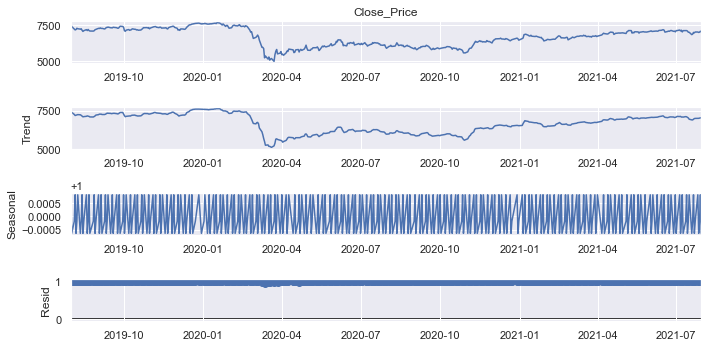

In [10]:
#Multiplicative Decompose

#Additive Decompose

result_mul = seasonal_decompose(x=df.Close_Price, model='multiplicative',freq=3)

plt.rcParams.update({'figure.figsize': (10,5)})
A2 =result_mul.plot()






## AutoCorrelation Function

#### Note:
- Take Lags as 40 and Zero as False
- Give title as ACF for Closed Prices and Font size is 20
- Store the output plot in A3 variable
    

**Sample image:**
    
<img src='Sample_images/Expected3.png' style='width:600px;height:400px'>

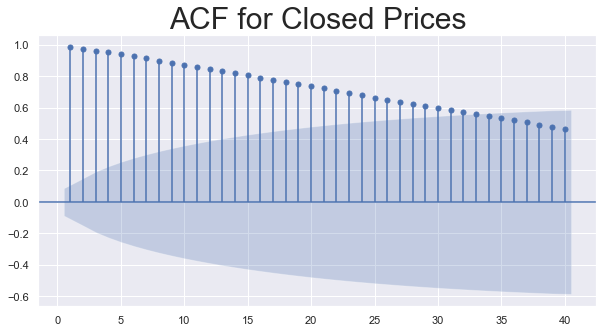

In [11]:
#AutoCorrelation Function



A3 = sgt.plot_acf(df.Close_Price,lags=40,zero=False)

title = plt.title('ACF for Closed Prices', size=30)
plt.show()




## Partial AutoCorrelation Function

#### Note:
- Take Lags as 40, Zero as False and method as 'ols
- Give title as PACF for Closed Prices and Font size is 20
- Store the output plot in A4 variable

**Sample image:**
    
<img src='Sample_images/Expected4.png' style='width:600px;height:400px'>

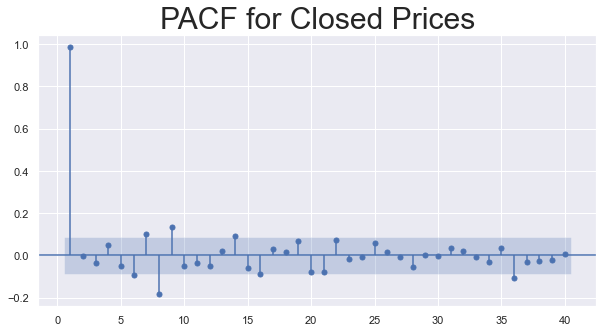

In [13]:
#Partial AutoCorrelation Function



A4 = sgt.plot_pacf(df.Close_Price,lags=40,method='ols',zero=False)

title = plt.title('PACF for Closed Prices', size=30)
plt.show()




## Auto Regressive Model 

### $ x_t = C + \phi * x_{t-1} + \epsilon_t  $

#### Note:
- Print the summary of fittedModel using the summary() function
- Store the output plot in A5 variable

In [17]:
#Auto Regressive Model  
model_ar=ARMA(df.Close_Price,order=(1,0))
result_ar=model_ar.fit()

A5 =result_ar.summary()
A5




G:\MachineLearning\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Close_Price   No. Observations:                  503
Model:                     ARMA(1, 0)   Log Likelihood               -2969.044
Method:                       css-mle   S.D. of innovations             88.222
Date:                Fri, 24 Sep 2021   AIC                           5944.088
Time:                        18:27:30   BIC                           5956.750
Sample:                             0   HQIC                          5949.055
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6838.7903    337.146     20.284      0.000    6177.996    7499.585
ar.L1.Close_Price     0.9898      0.006    169.146      0.000       0.978       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0103           +0.0000j            1.0103            0.0000
-----------------------------------------------------------------------------
"""

## Moving Average Model 

## $ r_t = C + \theta_1 * \epsilon_{t-1} + \epsilon_{t} $

#### Note:
- Print the summary of fittedModel using the summary() function
- Store the output plot in A6 variable

In [19]:
# Moving Average Model 
model_mr=ARMA(df.Close_Price,order=(0,1))
result_mr=model_mr.fit()

A6 =result_mr.summary()


A6 





G:\MachineLearning\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Close_Price   No. Observations:                  503
Model:                     ARMA(0, 1)   Log Likelihood               -3628.591
Method:                       css-mle   S.D. of innovations            327.880
Date:                Fri, 24 Sep 2021   AIC                           7263.181
Time:                        18:29:26   BIC                           7275.843
Sample:                             0   HQIC                          7268.148
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6659.4103     28.479    233.835      0.000    6603.592    6715.228
ma.L1.Close_Price     0.9499      0.013     75.113      0.000       0.925       0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0527           +0.0000j            1.0527            0.5000
-----------------------------------------------------------------------------
"""

### Run the below cell without modifying to save your answers

In [20]:
import pickle

def pickle1(FTSE, obj):
    with open(FTSE,'wb')as f:
        pickle.dump(obj,f,pickle.HIGHEST_PROTOCOL)   

def pickling():
    try:
        pickle1('A1.pickle',A1)
    except:
        print('A1 variale is not defined. Please check the variable')
    try:
        pickle1('A2.pickle',A2)
    except:
        print('A2 variale is not defined. Please check the variable')
    try:
        pickle1('A3.pickle',A3)
    except:
        print('A3 variale is not defined. Please check the variable')
    try:
        pickle1('A4.pickle',A4)
    except:
        print('A4 variale is not defined. Please check the variable')
    try:
        pickle1('A5.pickle',A5)
    except:
        print('A5 variale is not defined. Please check the variable')
    try:
        pickle1('A6.pickle',A6)
    except:
        print('A6 variale is not defined. Please check the variable')
        
pickling()